# Logistic Regression


Image Data Shape (1797, 64)
Label Data Shape (1797,)


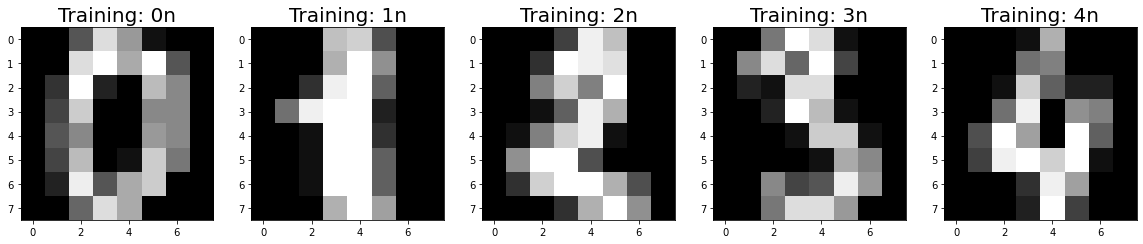

In [1]:
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt

digits = load_digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %in' % label, fontsize = 20)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, test_size=0.25, 
                                                    random_state=0)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)#fit data

C:\Users\filip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
logisticRegr.predict(x_test[0].reshape(1,-1))#predict new data
logisticRegr.predict(x_test[0:10])
predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [5]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


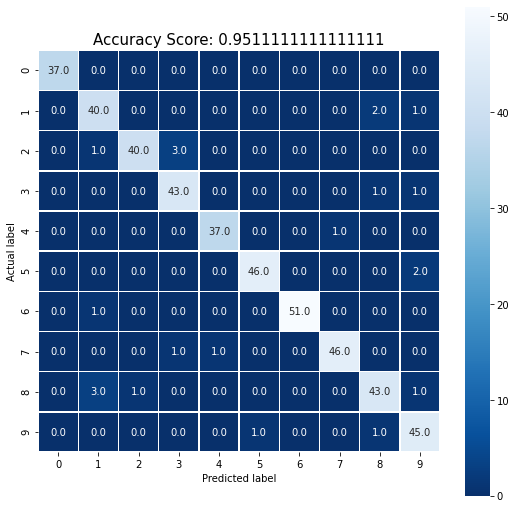

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

# Real World example

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [20]:
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [21]:
train_img, test_img, train_lbl, test_lbl = train_test_split( #split into training and test
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

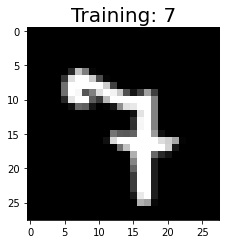

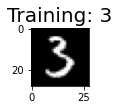

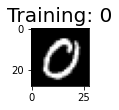

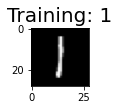

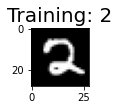

In [101]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Training: %s' % label, fontsize = 20)
  plt.show()

In [82]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_img, train_lbl)
# Returns a NumPy Array
# Predict for One Observation (image)
print(logisticRegr.predict(test_img[0].reshape(1,-1)))
logisticRegr.predict(test_img[0:10])
predictions = logisticRegr.predict(test_img)

['0']


C:\Users\filip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9184


In [34]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


# Trying with a google letter


In [117]:
import PIL
an_image = PIL.Image.open(r"num_1_2.JPEG").convert('LA') #convert image in array


image_sequence = an_image.getdata()
image_array = np.array(image_sequence)

print(image_array.shape)



(202500, 2)


In [118]:



logisticRegr.predict(image_array.reshape(784,-1))

ValueError: cannot reshape array of size 405000 into shape (784,newaxis)

In [110]:
logisticRegr.predict(num_res.reshape(1,-1))

array(['5'], dtype=object)